In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1


In [9]:
# 1.1.1
# determine what are not propper dates
# Improper formatting/garbage
# Propper date is month/day/year
# Note this only works if we clean up the stuff df["date_feuled"] = pd.to_datetime(df["date_feuled"], format='%b %d %Y', errors='raise')

# Load the dataset
df = pd.read_csv('logbook_assignment1.csv')
# df = df.head(100)
# Define a function to check if the date is valid
def is_valid_date(date_str):
    if pd.isna(date_str):
        return False
    try:
        pd.to_datetime(date_str, format='%b %d %Y', errors='raise')
        return True
        
    except (ValueError, TypeError):
        return False

# Apply the function to the 'date_fueled' column
# Creating a new column valid_date_feuled (this is the data set in memory not the actual csv file)
# this column is a binary column into trues and false

df['valid_date_fueled'] = df['date_fueled'].apply(is_valid_date)

# Calculate the percentage of invalid dates
invalid_date_percentage = (df['valid_date_fueled'].value_counts(normalize=True) * 100)[False]

print(f"Percentage of invalid 'date_fueled' entries: {invalid_date_percentage:.2f}%")


C:\Users\saadd\AppData\Local\Temp\ipykernel_8648\2229074167.py:8: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


Percentage of invalid 'date_fueled' entries: 11.68%


In [10]:
# 1.1.2
df['date_fueled'] = df.apply(lambda row: row['date_captured'] if not is_valid_date(row['date_fueled']) and is_valid_date(row['date_captured']) else row['date_fueled'], axis=1)
df.head(11)


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,Oct 23 2021,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,Nov 20 2021,Dec 12 2021,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,Jan 20 2022,Jan 20 2022,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,Apr 16 2018,Apr 16 2018,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,Nov 29 2020,Nov 29 2020,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [11]:
#1.1.3
df['date_fueled'] = df.apply(lambda row: pd.NaT if not is_valid_date(row['date_fueled']) else row['date_fueled'], axis=1)
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')
print(df.dtypes)
df.head(11)

date_fueled          datetime64[ns]
date_captured        datetime64[ns]
odometer                     object
gallons                      object
cost_per_gallon              object
total_spent                  object
mpg                          object
miles                        object
user_url                     object
valid_date_fueled              bool
dtype: object


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [12]:
#1.1.4
# NOTE do we change both columns, and when they say remove do they mean "NaT" or remove the row?

df['date_fueled'] = df.apply(lambda row: pd.NaT if (row['date_fueled'].year < 2005 or row['date_fueled']>pd.Timestamp.now()) else row['date_fueled'], axis=1)
df['date_captured'] = df.apply(lambda row: pd.NaT if (row['date_captured'].year < 2005 or row['date_captured']>pd.Timestamp.now()) else row['date_captured'], axis=1)

df.head()


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True


In [14]:
#dont need this coloumn anymore

df = df.drop(columns=['valid_date_fueled'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


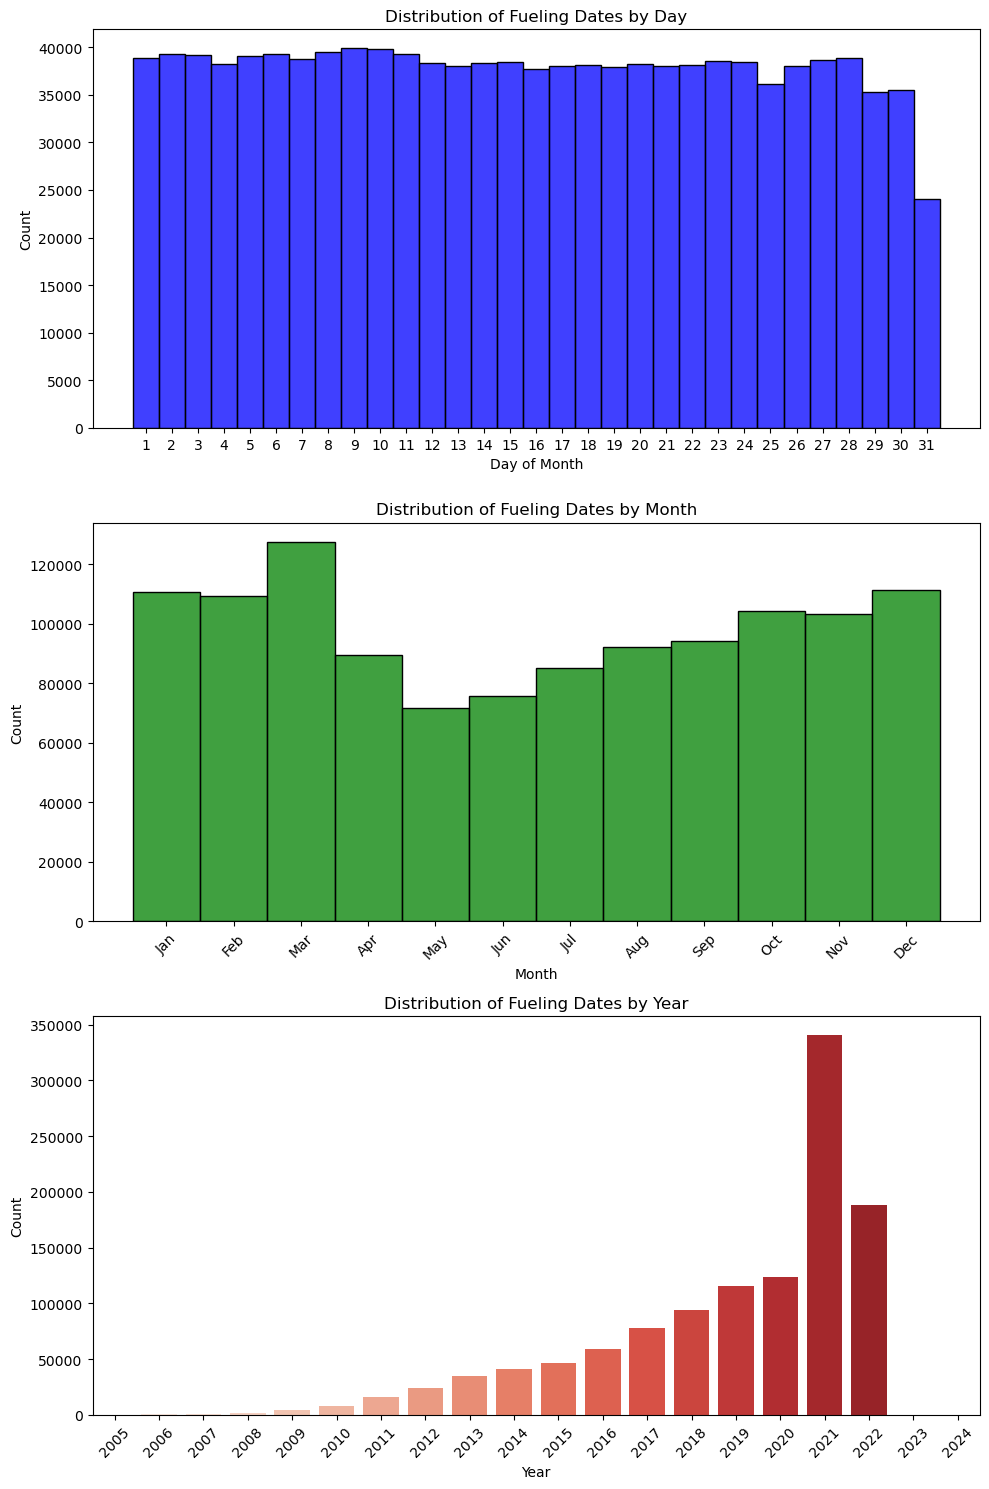

In [18]:
#1.1.5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for demonstration purposes
# df = pd.read_csv('your_data.csv')  # Uncomment and use your actual data

# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Drop rows where 'date_fueled' is NaT (not-a-time)
df = df.dropna(subset=['date_fueled'])

# Extract day, month, and year
df['day'] = df['date_fueled'].dt.day
df['month'] = df['date_fueled'].dt.month
df['year'] = df['date_fueled'].dt.year

# Plot settings
plt.figure(figsize=(10, 15))

# Plot for day
plt.subplot(3, 1, 1)
sns.histplot(df['day'], bins=31, discrete=True, kde=False, color='blue')
plt.title('Distribution of Fueling Dates by Day')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.xticks(range(1, 32))  # Set x-ticks to show all days of the month

# Plot for month
plt.subplot(3, 1, 2)
sns.histplot(df['month'], bins=12, discrete=True, kde=False, color='green')
plt.title('Distribution of Fueling Dates by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Plot for year
plt.subplot(3, 1, 3)
sns.countplot(data=df, x='year', palette='Reds')
plt.title('Distribution of Fueling Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




In [19]:
missing_gallons = df['gallons'].isna().mean() * 100
missing_miles = df['miles'].isna().mean() * 100
missing_odometer = df['odometer'].isna().mean() * 100

# Print out the percentages
print(f"Percentage of missing values in 'gallons': {missing_gallons:.2f}%")
print(f"Percentage of missing values in 'miles': {missing_miles:.2f}%")
print(f"Percentage of missing values in 'odometer': {missing_odometer:.2f}%")

Percentage of missing values in 'gallons': 6.32%
Percentage of missing values in 'miles': 87.55%
Percentage of missing values in 'odometer': 12.69%
